In [63]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd

### Create the musical notes

In [74]:
#-- Create the list of musical notes

scale=[] 
for k in range(35, 65): 
    note=440*2**((k-49)/12)
    if k%12 != 0 and k%12 != 2 and k%12 != 5 and k%12 != 7 and k%12 != 10:
        scale.append(note) # add musical note (skip half tones)
n_notes = len(scale) # number of musical notes



### Open just the temperature data

In [75]:
url = "https://raw.githubusercontent.com/jsaraviadrago/sound-data/main/Global%20Temperature.csv"

df = pd.read_csv(url, sep = ";")



### Here I used the monthly, annual and five year anomaly in weather

In [88]:
size = df.shape[0]
x = np.arange(size)

y = df['Monthly Anomaly']
min_y = np.min(y)
max_y = np.max(y)
yf = 0.999*n_notes*(y-min_y)/(max_y-min_y) 

z = df[' Annual Anomaly']
min_z = np.min(z)
max_z = np.max(z)
zf = 0.1 + 0.4*(z-min)/(max_z-min_z) 

# volume of each note
v = df['Five-Year Anomaly']
min_v = np.min(v)
max_v = np.max(v)
vf = 500 + 2000 * (1 - (v - min_v) / (max_v - min_v))


### Plot the sound if it's all in the same tone

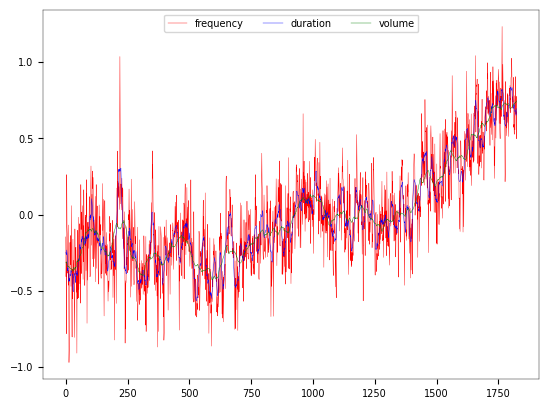

In [89]:
#-- plot data

mpl.rcParams['axes.linewidth'] = 0.3
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7) 
plt.rcParams['axes.linewidth'] = 0.1
plt.plot(x, y, color='red', linewidth = 0.3)
plt.plot(x, z, color='blue', linewidth = 0.3)
plt.plot(x, v, color='green', linewidth = 0.3)
plt.legend(['frequency','duration','volume'], fontsize="7", 
    loc ="upper center", ncol=3)
plt.show()

### Create the music

In [90]:
#-- Turn the data into music

def get_sine_wave(frequency, duration, sample_rate=44100, amplitude=4096):
    t = np.linspace(0, duration, int(sample_rate*duration))
    wave = amplitude*np.sin(2*np.pi*frequency*t)
    return wave

wave=[]
for t in x: # loop over dataset observations, create one note per observation
    note = int(yf[t])
    duration = zf[t]
    frequency = scale[note]    
    volume = vf[t]  ## 2048
    new_wave = get_sine_wave(frequency, duration = zf[t], amplitude = vf[t])
    wave = np.concatenate((wave,new_wave))
wavfile.write('sound_weather.wav', rate=44100, data=wave.astype(np.int16))

ValueError: Number of samples, -258, must be non-negative.